# 2.1. CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

## 2.1.1. Ôn tập lý thuyết

## 2.1.2. Bài làm mẫu

## 2.1.3. Bài tập thực hành 1

## 2.1.4. Bài tập thực hành 2

Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường. Dữ liệu lấy từ
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

### 1. Tải các thư viện cần thiết

In [ ]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [1]:
# 1. Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400  # tăng độ phân giải ảnh

import graphviz  # dùng để hiển thị cây quyết định
from sklearn import tree
from sklearn.model_selection import train_test_split

### 2. Nạp dữ liệu và xem thông tin

In [2]:
# 2. Nạp dữ liệu
df = pd.read_csv("Dataset/diabetes_prediction_dataset.csv")

print("✅ Dữ liệu ban đầu:")
print(df.head())
print("-" * 60+"\n")
print("📊 Thông tin dữ liệu:")
print(df.info())
print("-" * 60+"\n")
print("🕳️ Kiểm tra giá trị null:")
print(df.isnull().sum())


✅ Dữ liệu ban đầu:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
------------------------------------------------------------

📊 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------            

##### Nhận xét dữ liệu

Dataset gồm 100.000 dòng và 9 cột, cung cấp thông tin về các yếu tố nguy cơ và tình trạng tiểu đường của bệnh nhân.

Các cột gender và smoking_history là dữ liệu phân loại (categorical), còn các cột age, bmi, HbA1c_level, blood_glucose_level là dữ liệu số (numerical).

Cột diabetes là target, với 0 = không tiểu đường, 1 = tiểu đường.

Dataset không có giá trị null, nên dữ liệu khá sạch, không cần xử lý missing value.

Có thể quan sát phân bố BMI, tuổi, HbA1c và đường huyết để đánh giá mối quan hệ giữa các chỉ số sức khỏe và khả năng mắc tiểu đường, từ đó hỗ trợ mô hình dự đoán.

### 3.Mã hóa biến phân loại (One-Hot Encoding)

In [3]:
# 3. Mã hóa các biến phân loại
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=False)

print("✅ Dữ liệu sau mã hóa:")
print(df_encoded.head())

✅ Dữ liệu sau mã hóa:
    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0           True        False         False   
1         0           True        False         False   
2         0          False         True         False   
3         0           True        False         False   
4         0          False         True         False   

   smoking_history_No Info  smoking_history_current  smoking_history_ever  \
0                    False                    False                 Fal



Trong dataset, các cột gender và smoking_history là dữ liệu phân loại (categorical). Mô hình máy học như Decision Tree chỉ hiểu dữ liệu số, vì vậy chúng ta cần chuyển các giá trị phân loại sang dạng nhị phân (one-hot encoding).

- Sử dụng pd.get_dummies() để tạo một cột cho mỗi giá trị của biến phân loại.
- drop_first=False giữ tất cả các cột mới, giúp mô hình xem xét đầy đủ thông tin.
- Ví dụ:
  - gender có giá trị Female, Male, Other → được chuyển thành ba cột: gender_Female, gender_Male, gender_Other.
  - smoking_history có nhiều giá trị như never, current, former… → được chuyển thành các cột riêng.

Kết quả là mỗi hàng dữ liệu giờ sẽ có các cột True/False tương ứng với giá trị phân loại của nó, và tất cả các cột numeric giữ nguyên. Điều này cho phép Decision Tree và các mô hình khác sử dụng đầy đủ thông tin từ các biến phân loại.


### 4.Chia dữ liệu thành tập train / test

In [4]:
# 4. Tách đầu vào (X) và nhãn đầu ra (y)
X = df_encoded.drop("diabetes", axis=1)
y = df_encoded["diabetes"]

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Tập huấn luyện: {X_train.shape}")
print(f"✅ Tập kiểm tra: {X_test.shape}")


✅ Tập huấn luyện: (80000, 15)
✅ Tập kiểm tra: (20000, 15)


Trong bước này, chúng ta tách dữ liệu thành hai phần:

- X: các đặc trưng (features), gồm tất cả các cột ngoại trừ cột diabetes.
- y: nhãn đầu ra (target), chính là cột diabetes.

Sau đó, dữ liệu được chia thành tập huấn luyện (train) và tập kiểm tra (test) để đánh giá mô hình:

- test_size=0.2 nghĩa là 20% dữ liệu dùng để kiểm tra, 80% dùng để huấn luyện.
- random_state=42 đảm bảo việc chia dữ liệu có thể lặp lại được.

Kết quả trên dataset của chúng ta:

- Tập huấn luyện: 80.000 mẫu, 15 đặc trưng.
- Tập kiểm tra: 20.000 mẫu, 15 đặc trưng.

Việc chia dữ liệu giúp mô hình học từ phần lớn dữ liệu nhưng vẫn được kiểm tra trên dữ liệu chưa thấy, từ đó đánh giá khả năng tổng quát hóa.








### 5.Huấn luyện mô hình Decision Tree

In [5]:
# 5. Xây dựng mô hình cây quyết định
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(" Mô hình cây quyết định đã được huấn luyện xong!")


 Mô hình cây quyết định đã được huấn luyện xong!


### 6.Hiển thị cây bằng Graphviz


(process:12932): Pango-CRITICAL **: 20:49:01.504: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12932): Pango-CRITICAL **: 20:49:01.504: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12932): Pango-CRITICAL **: 20:49:01.504: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12932): Pango-CRITICAL **: 20:49:01.504: pango_font_description_get_family: assertion 'desc != NULL' failed


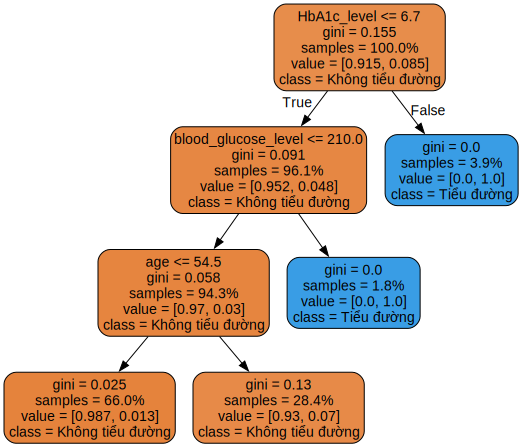

In [6]:
# 6. Xuất cây quyết định
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=["Không tiểu đường", "Tiểu đường"],
    proportion=True
)

# Hiển thị cây
graph = graphviz.Source(dot_data)
graph
